# Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Reading Data

In [26]:
dataset = pd.read_csv('bcdata.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Null Values

In [27]:
# checking for missing values
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [28]:
# checking datatypes 
dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Feature Extracting

In [29]:
# dropping variables
drop_columns = ['Unnamed: 32', 'id']
dataset = dataset.drop(drop_columns, axis = 1)

In [30]:
dataset.shape

(569, 31)

In [31]:
# convertion
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Data Visualization

Text(0, 0.5, 'Frequency')

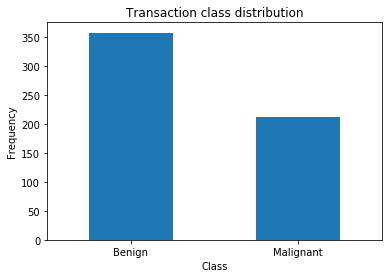

In [33]:
# plotting the labels with the frequency 
Labels = ['Benign','Malignant']
classes = pd.value_counts(dataset['diagnosis'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), Labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

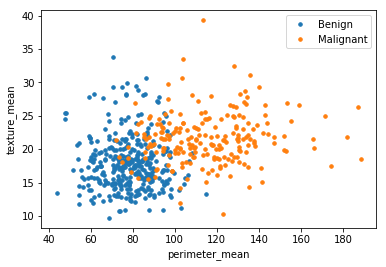

In [34]:
# Plotting the features with each other.
groups = dataset.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.perimeter_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.xlabel("perimeter_mean")
plt.ylabel("texture_mean")
plt.show()    

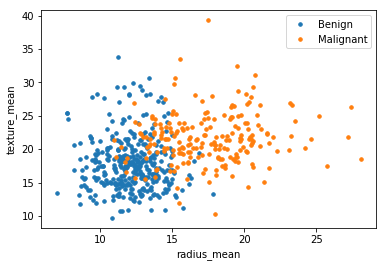

In [35]:
groups = dataset.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.radius_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("texture_mean")
plt.xlabel("radius_mean")
plt.show()    

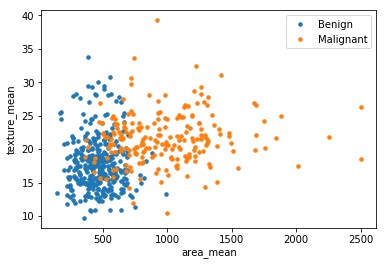

In [36]:
groups = dataset.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.area_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("texture_mean")
plt.xlabel("area_mean")
plt.show()    

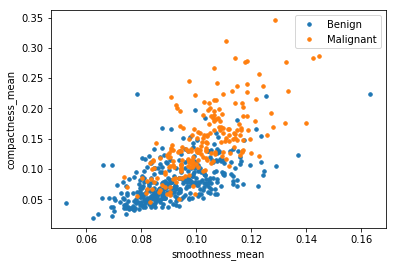

In [37]:
groups = dataset.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.smoothness_mean, group.compactness_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("compactness_mean")
plt.xlabel("smoothness_mean")
plt.show()

# Splitting Data

In [38]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.3)

# Scaling Data

In [39]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Building Model

In [40]:
classifier = KNeighborsClassifier(n_neighbors=19, p=2, metric='euclidean')

# training model 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

# Model Prediction

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Report Generation

In [56]:
print("Report:")
print("f1 score =", f1_score(y_test, y_pred))
print("precision score =", precision_score(y_test, y_pred))
print("recall score =", recall_score(y_test, y_pred))
print("accuracy score =", accuracy_score(y_test, y_pred))

Report:
f1 score = 0.9256198347107438
precision score = 0.9655172413793104
recall score = 0.8888888888888888
accuracy score = 0.9473684210526315


In [47]:
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  7  56]]
